In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
y_data = pd.read_csv('responses.csv')

In [3]:
y_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


<h2>What is the range between male and female heights?</h2>
We will take a look at our data distribution to see what we are working with. One good way to first explore our data is looking at the gender distribution

In [27]:
f_data = y_data[y_data['Gender'] == 'female']
f_data.shape

(593, 150)

In [28]:
m_data = y_data[y_data['Gender'] == 'male']
m_data.shape

(411, 150)

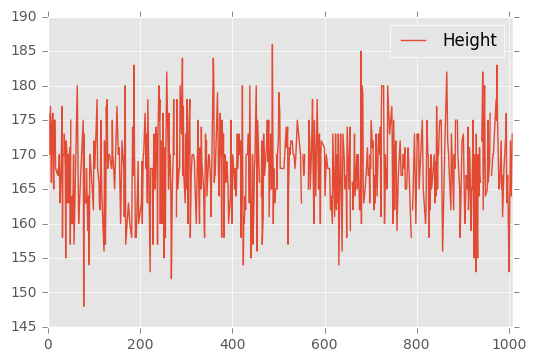

In [24]:
f_data.plot(y = 'Height')
plt.show()

Looks like there is an outlier in the female height data. Looks take a look at this outlier

In [15]:
f_outlier = f_data['Height'].min()
print f_outlier

62.0


It seems that one of the females recorded a 62 cm height.
After some research, we see that the shortest woman living is 62.8cm. While it is possible that this outlier is refering to this person, we do not want one outlier to skew our data and our analyzes.
Hence, we can either:
<ol>
<li>Remove the data</li>
<li>Fix the data</li>
</ol>

We decided assume that the height input is an error, and the actual height is 162, a norm within our female height data. Therefore, we will change the 62 cm to 162 cm

In [16]:
f_data.loc[f_data[f_data['Height'] == f_outlier].index.tolist(),'Height'] = 162.0

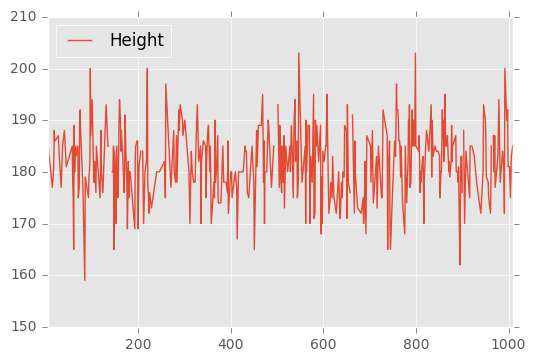

In [18]:
m_data.plot(y = 'Height')
plt.show()

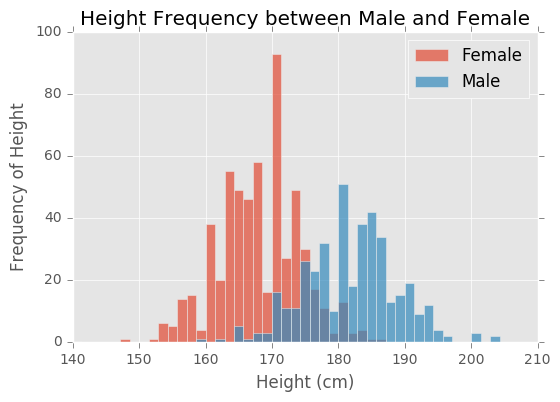

In [9]:
bins = np.linspace(140, 210, 50)

plt.hist(f_data['Height'].tolist(), bins, range=(bins.min(), bins.max()), alpha = 0.7, label = 'Female')
plt.hist(m_data['Height'].tolist(), bins, range=(bins.min(), bins.max()), alpha = 0.7, label = 'Male')
plt.legend(loc = 'upper right')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency of Height')
plt.title('Height Frequency between Male and Female')
plt.show()

<h2> Relationship between "I live a very healthy lifestyle?" and "smoking habits" and "drinking habits". I will combine these two habits to make  another column </h2>

We want to explore our healthy lifestyle. Lets see smoking, drinking, and our opinion on if that makes us more healthy. Blah blah blah, how this reflects "surveys' blah blah blah. Also put in "I worry about my health"

In [90]:
smoking_id = y_data['Smoking'].unique()
alc_id = y_data['Alcohol'].unique()
print smoking_id, '\n', alc_id

['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan] 
['drink a lot' 'social drinker' 'never' nan]


We are going to convert the smoking and alc responses to numerical values. 0 being 'never' and 5 being 'a lot'

In [122]:
life_dict = {'never smoked': 5, 'tried smoking': 4, 'former smoker': 2, 'current smoker': 0,'never': 5, 'social drinker': 3, 'drink a lot': 0}

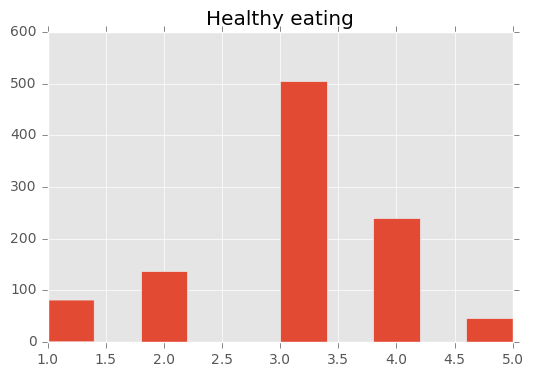

In [97]:
y_data.hist(column='Healthy eating')
plt.show()

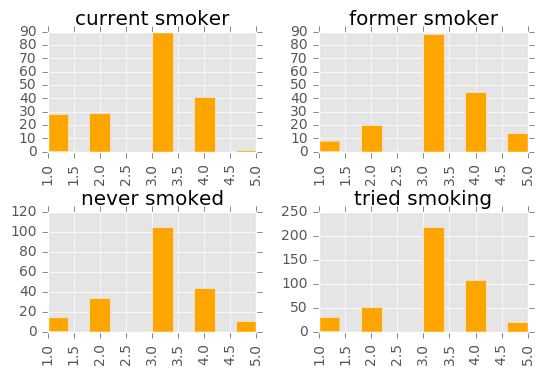

In [72]:
y_data.hist(column='Healthy eating', by='Smoking', color = 'orange')
plt.ylim((0,250))
plt.show()

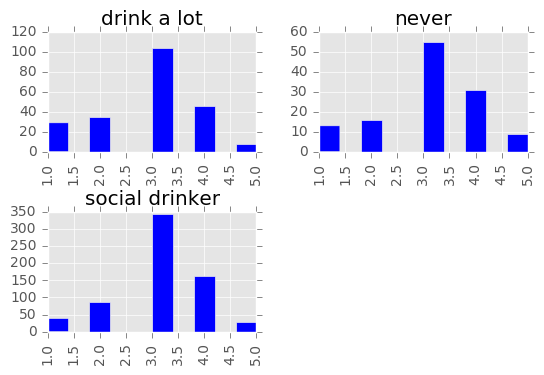

In [88]:
y_data.hist(column='Healthy eating', by='Alcohol', color = 'Blue')
plt.ylim((0,250))
plt.show()

Convert the smoking and alcohol into numeric, and then put them together

In [134]:
for index, row in y_data.iterrows():
    try:
        val = life_dict[row['Alcohol']] + life_dict[row['Smoking']]
        y_data.loc[index,'Life health'] = val
    except:
        y_data.loc[index,'Life health'] = np.nan
    

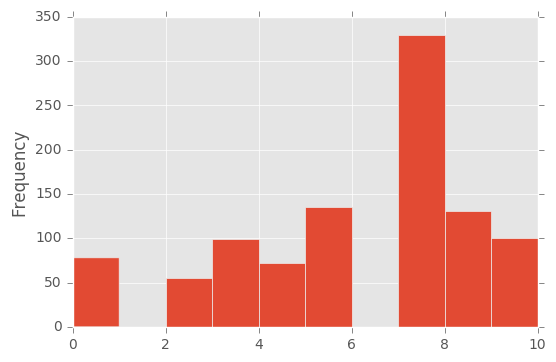

In [183]:
y_data['Life health'].plot.hist(bins = np.linspace(0, 10, 11))
plt.show()

In [175]:
t1 = y_data.dropna()

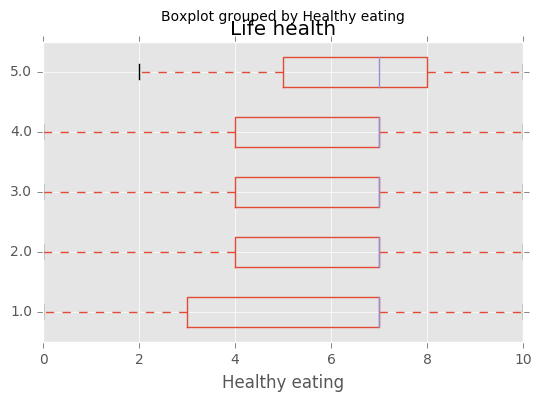

In [179]:
t1.boxplot(column='Life health', by='Healthy eating', vert=False)
plt.show()